In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from konlpy.tag import Okt

In [3]:
len(movie_reviews.fileids(categories='pos')), len(movie_reviews.fileids(categories='neg'))

(1000, 1000)

In [4]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [5]:
categories[:10]

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']

In [6]:
result = TextBlob(reviews[0])
result.sentiment

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)

In [9]:
print(result.words)
print(result.tags)
print(result.noun_phrases)

['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'what', "'s", 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks', 'just', 'did', "n't", 'snag', 'this', 

In [10]:
def sentiment_TextBlob(docs):
    result = []
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            result.append('pos')
        else:
            result.append('neg')
    return result

In [12]:
print(sentiment_TextBlob(reviews))

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos'

In [13]:
def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    result = []
    for doc in docs:
        if afn.score(doc) > 0:
            result.append('pos')
        else:
            result.append('neg')
    return result

In [14]:
print(sentiment_Afinn(reviews))

['neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos'

In [15]:
def sentiment_vader(docs):
    analyzer = SentimentIntensityAnalyzer()
    result = []
    for doc in docs:
        if analyzer.polarity_scores(doc)['compound'] > 0:
            result.append('pos')
        else:
            result.append('neg')
    return result

In [16]:
print(sentiment_vader(reviews))

['pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos'

In [17]:
print(accuracy_score(categories, sentiment_TextBlob(reviews)), accuracy_score(categories, sentiment_Afinn(reviews)), accuracy_score(categories, sentiment_vader(reviews)))

0.6 0.664 0.635


In [18]:
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)
len(X_train), len(X_test)

(1600, 400)

In [19]:
tf = TfidfVectorizer(token_pattern="[\w']+", min_df=3, max_df=0.5, stop_words='english')

In [20]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((1600, 16649), (400, 16649))

In [28]:
nb_clf = MultinomialNB(alpha=1).fit(X_train_tf, y_train)
nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test)

(0.954375, 0.835)

In [29]:
df = pd.read_csv('./data/daum_movie_review.csv')
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


<AxesSubplot:xlabel='rating'>

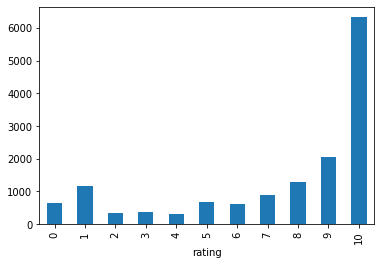

In [30]:
df.rating.value_counts().sort_index().plot.bar()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7)
len(X_train), len(X_test)

(11043, 3682)

In [32]:
okt = Okt()

def okt_tokenizer(text):
    target_tags = ['Noun', 'Verb', 'Abjective']
    result = [word for word, tag in okt.pos(text, norm=True, stem=True) if tag in target_tags]
    return result

In [33]:
tf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=5, max_df=0.5)
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)
X_train_tf.shape, X_test_tf.shape

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((11043, 2650), (3682, 2650))

In [49]:
ridge = Ridge(alpha=2).fit(X_train_tf, y_train)
ridge.score(X_train_tf, y_train), ridge.score(X_test_tf, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

(0.5234182463416532, 0.40120171079295963)

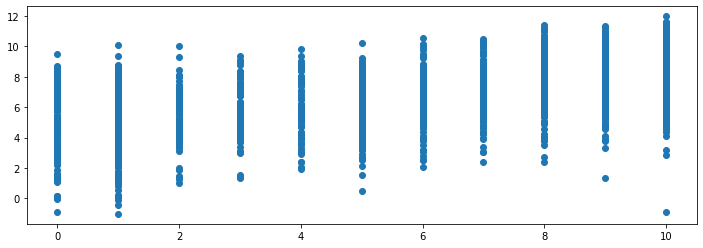

In [51]:
plt.figure(figsize=(12, 4))
plt.scatter(y_test, ridge.predict(X_test_tf))

In [56]:
logreg = LogisticRegression(C=1, max_iter=1000).fit(X_train_tf, y_train)
logreg.score(X_train_tf, y_train), logreg.score(X_test_tf, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

(0.5508466902109934, 0.45382944052145574)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


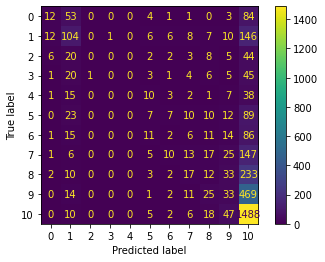

In [57]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_tf, y_test)